In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from src.definitions import ROOT_DIR
from src.visualization.visualize import plot_ecdf

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
plt.style.use('seaborn-poster')

# Load train data

In [4]:
train_path = ROOT_DIR / 'data/external' / 'CSV_train.csv'

assert train_path.is_file()

In [5]:
data = pd.read_csv(train_path, sep=';')

In [6]:
data.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
575986,31/2-8,1067.172980,526927.06250,6758509.0,-1042.125122,HORDALAND GP.,NaN,19.184177,NaN,1.257676,...,NaN,NaN,NaN,0.053328,NaN,NaN,NaN,NaN,65000,1.0
794844,34/10-35,1664.791000,463380.09375,6771053.5,-1641.668213,HORDALAND GP.,Utsira Fm.,16.847265,NaN,0.733523,...,NaN,NaN,NaN,0.026328,NaN,NaN,NaN,NaN,65030,1.0
248152,25/2-14,1343.033901,476932.31250,6625438.0,-1320.681274,HORDALAND GP.,Skade Fm.,13.221658,1.539871,1.329023,...,NaN,NaN,0.971658,0.063349,NaN,NaN,NaN,NaN,65000,1.0
947078,34/8-3,2044.312434,475757.78125,6808438.5,-2021.132935,SHETLAND GP.,Jorsalfare Fm.,12.314038,1.674262,1.653646,...,NaN,NaN,NaN,-0.008976,NaN,NaN,NaN,NaN,65000,1.0
396095,25/7-2,2904.816000,454812.96875,6571020.0,-2879.191650,SHETLAND GP.,Jorsalfare Fm.,18.476761,7.040954,4.326374,...,1.761200,NaN,0.969656,-0.009330,NaN,5.528788,NaN,5.452923,80000,1.0
249681,25/2-14,1575.441901,476925.28125,6625431.5,-1552.891357,HORDALAND GP.,Grid Fm.,13.156902,1.327037,1.017125,...,NaN,NaN,0.906901,0.047527,NaN,NaN,NaN,NaN,65000,1.0
942622,34/8-3,1359.704434,475750.56250,6808446.0,-1336.658569,HORDALAND GP.,Utsira Fm.,12.624999,0.909415,0.910925,...,NaN,NaN,NaN,-0.041002,NaN,NaN,NaN,NaN,65000,1.0
1164287,7/1-1,2166.976800,450383.43750,6406641.5,-2132.866455,ROGALAND GP.,Lista Fm.,13.484529,0.661910,0.661619,...,1.153004,NaN,1.234530,0.039283,1.545761,NaN,NaN,NaN,65000,1.0
728733,33/9-1,2635.314000,437780.34375,6791573.5,-2610.313965,BAAT GP.,Rannoch Fm.,11.779037,2.755109,1.893842,...,NaN,NaN,NaN,-0.053523,NaN,NaN,NaN,NaN,30000,1.0
499012,30/3-3,1234.510000,497355.50000,6737313.0,-1212.469482,HORDALAND GP.,Utsira Fm.,17.415369,1.274164,0.869733,...,NaN,NaN,NaN,-0.018151,NaN,NaN,NaN,1.273566,65030,2.0


In [7]:
data.shape

(1170511, 29)

## Raw features

In [8]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

# RDEP distribution per well

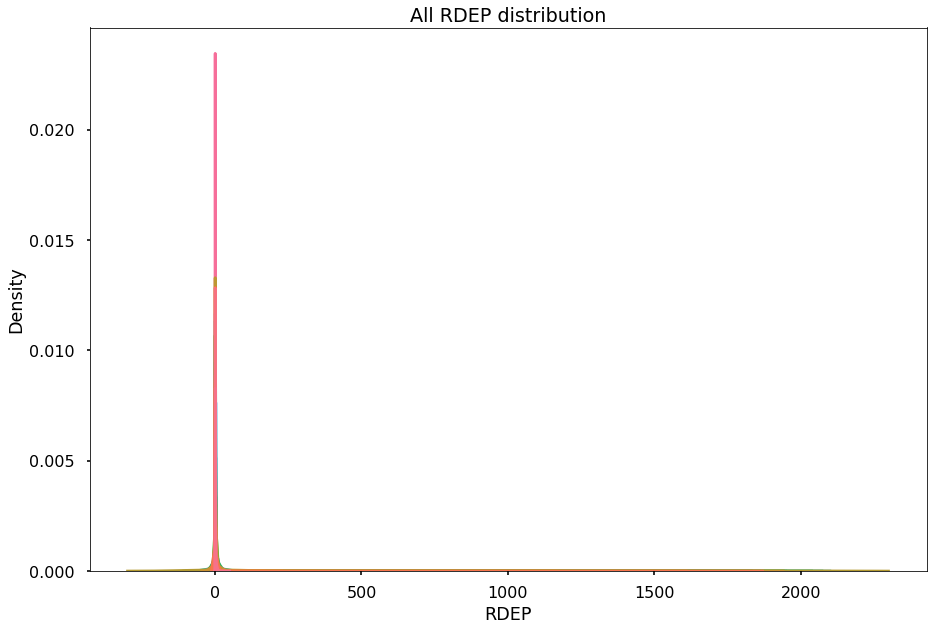

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.kdeplot(data=data,
            x='RDEP',
            hue='WELL',
            common_norm=True,
            fill=False,
            legend=False,
            ax=ax)

plt.title('All RDEP distribution')

plt.show()

Quantile 5.0%: 0.56
Quantile 95.0%: 10.39


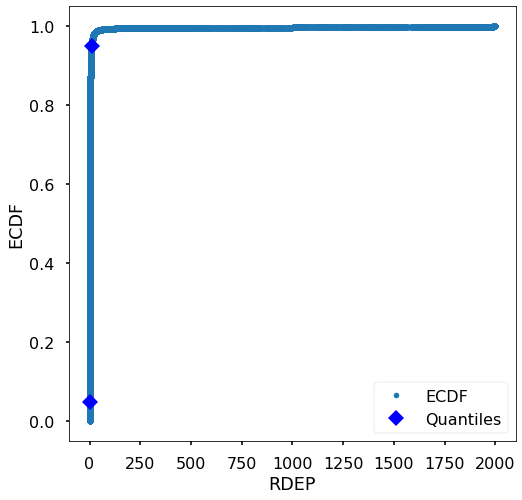

In [25]:
plot_ecdf(data['RDEP'], 'RDEP', quantiles=[0.05, 0.95])

In [26]:
low_gr, high_gr = 0.5, 10

In [29]:
from matplotlib import ticker as mticker

In [31]:
data['RDEP_log'] = np.log(data['RDEP'])

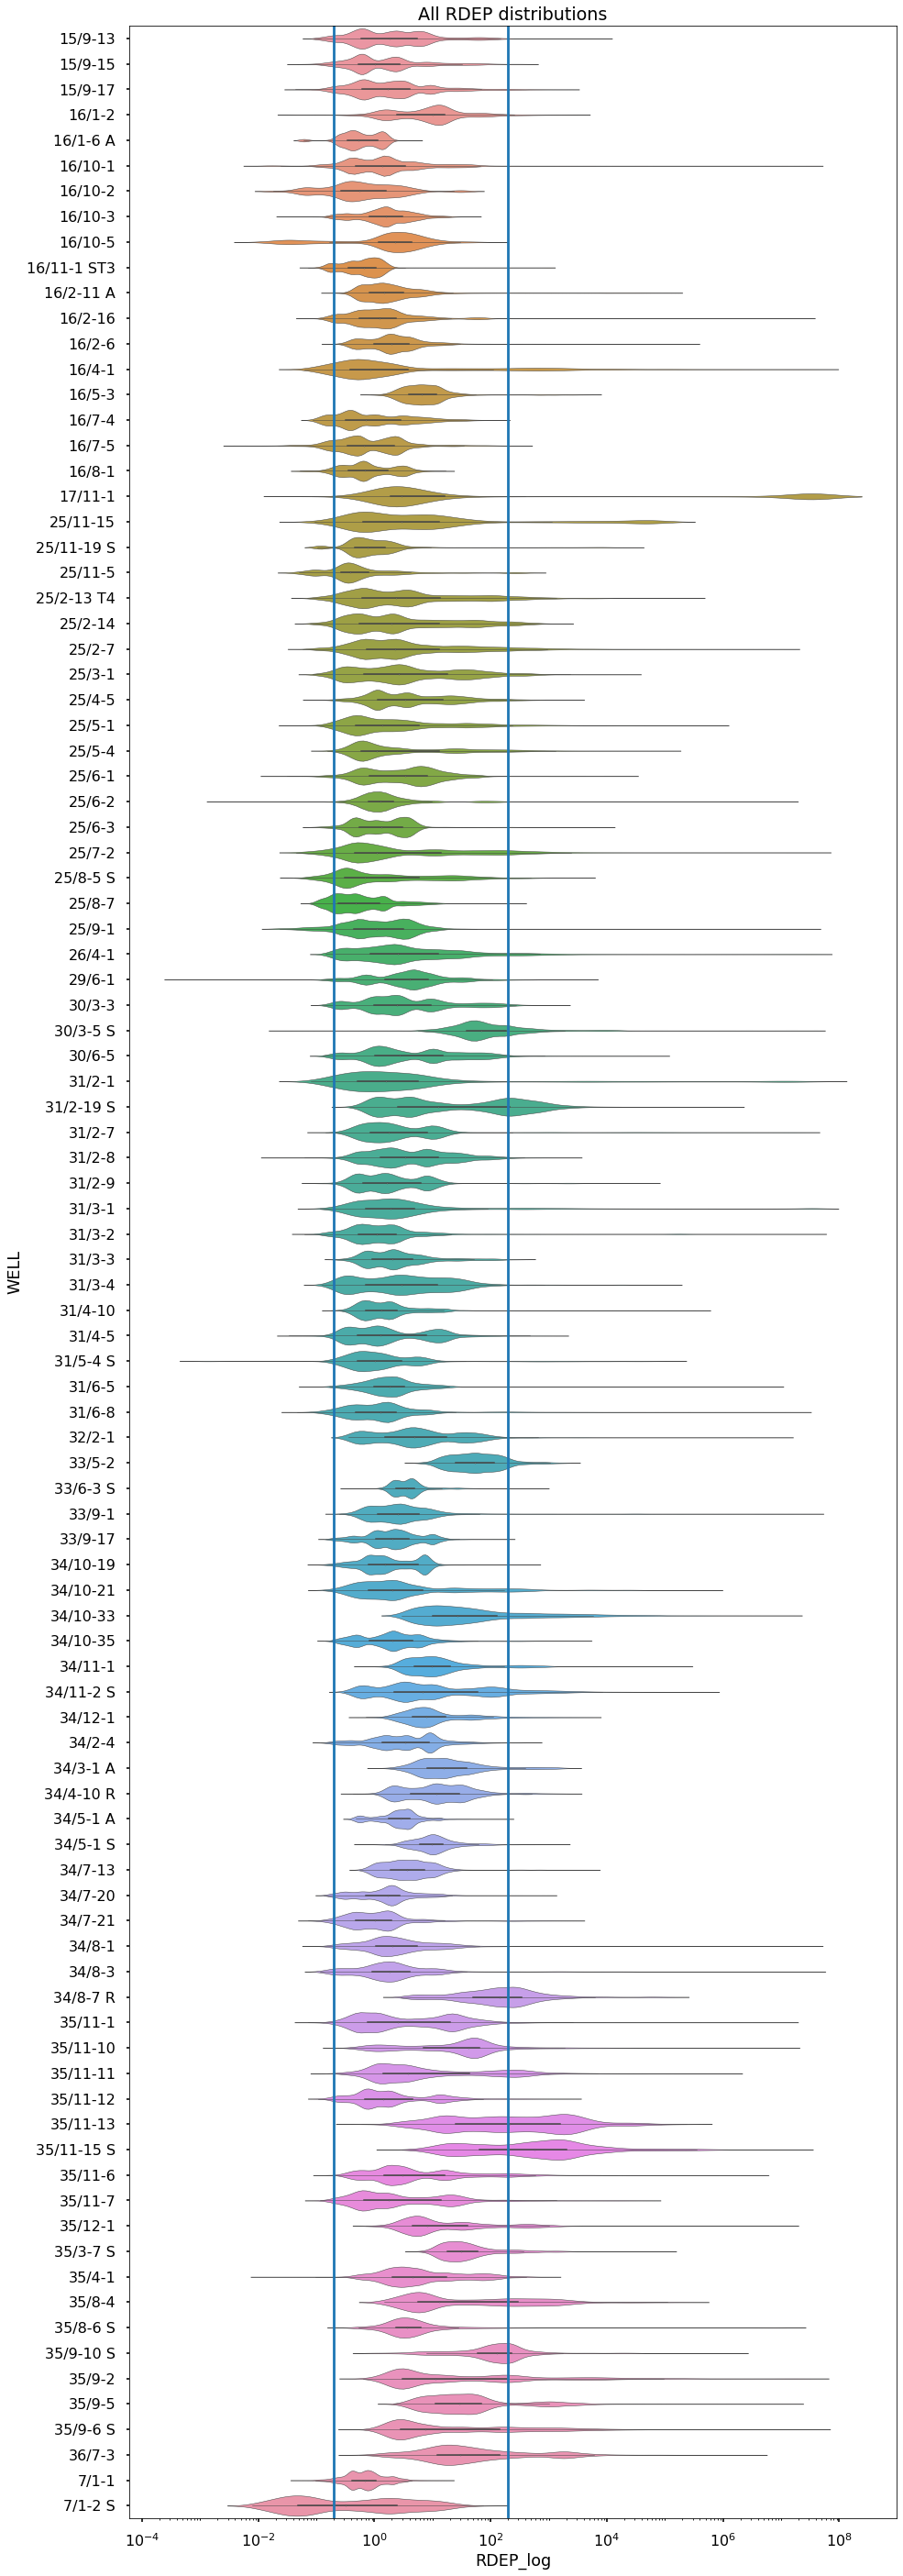

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 50))

sns.violinplot(data=data,
               x='RDEP_log',
               y='WELL',
               common_norm=False,
               scale="width",
               fill=False,
               legend=False,
               linewidth=0.5,
               ax=ax)

plt.axvline(x=np.log(low_gr))
plt.axvline(x=np.log(high_gr))


plt.title('All RDEP distributions')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.xaxis.set_ticks([np.log10(x) for p in range(-4,8) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)

plt.show()

# Conductivity

In [37]:
data['COND'] = 1 / data['RDEP']

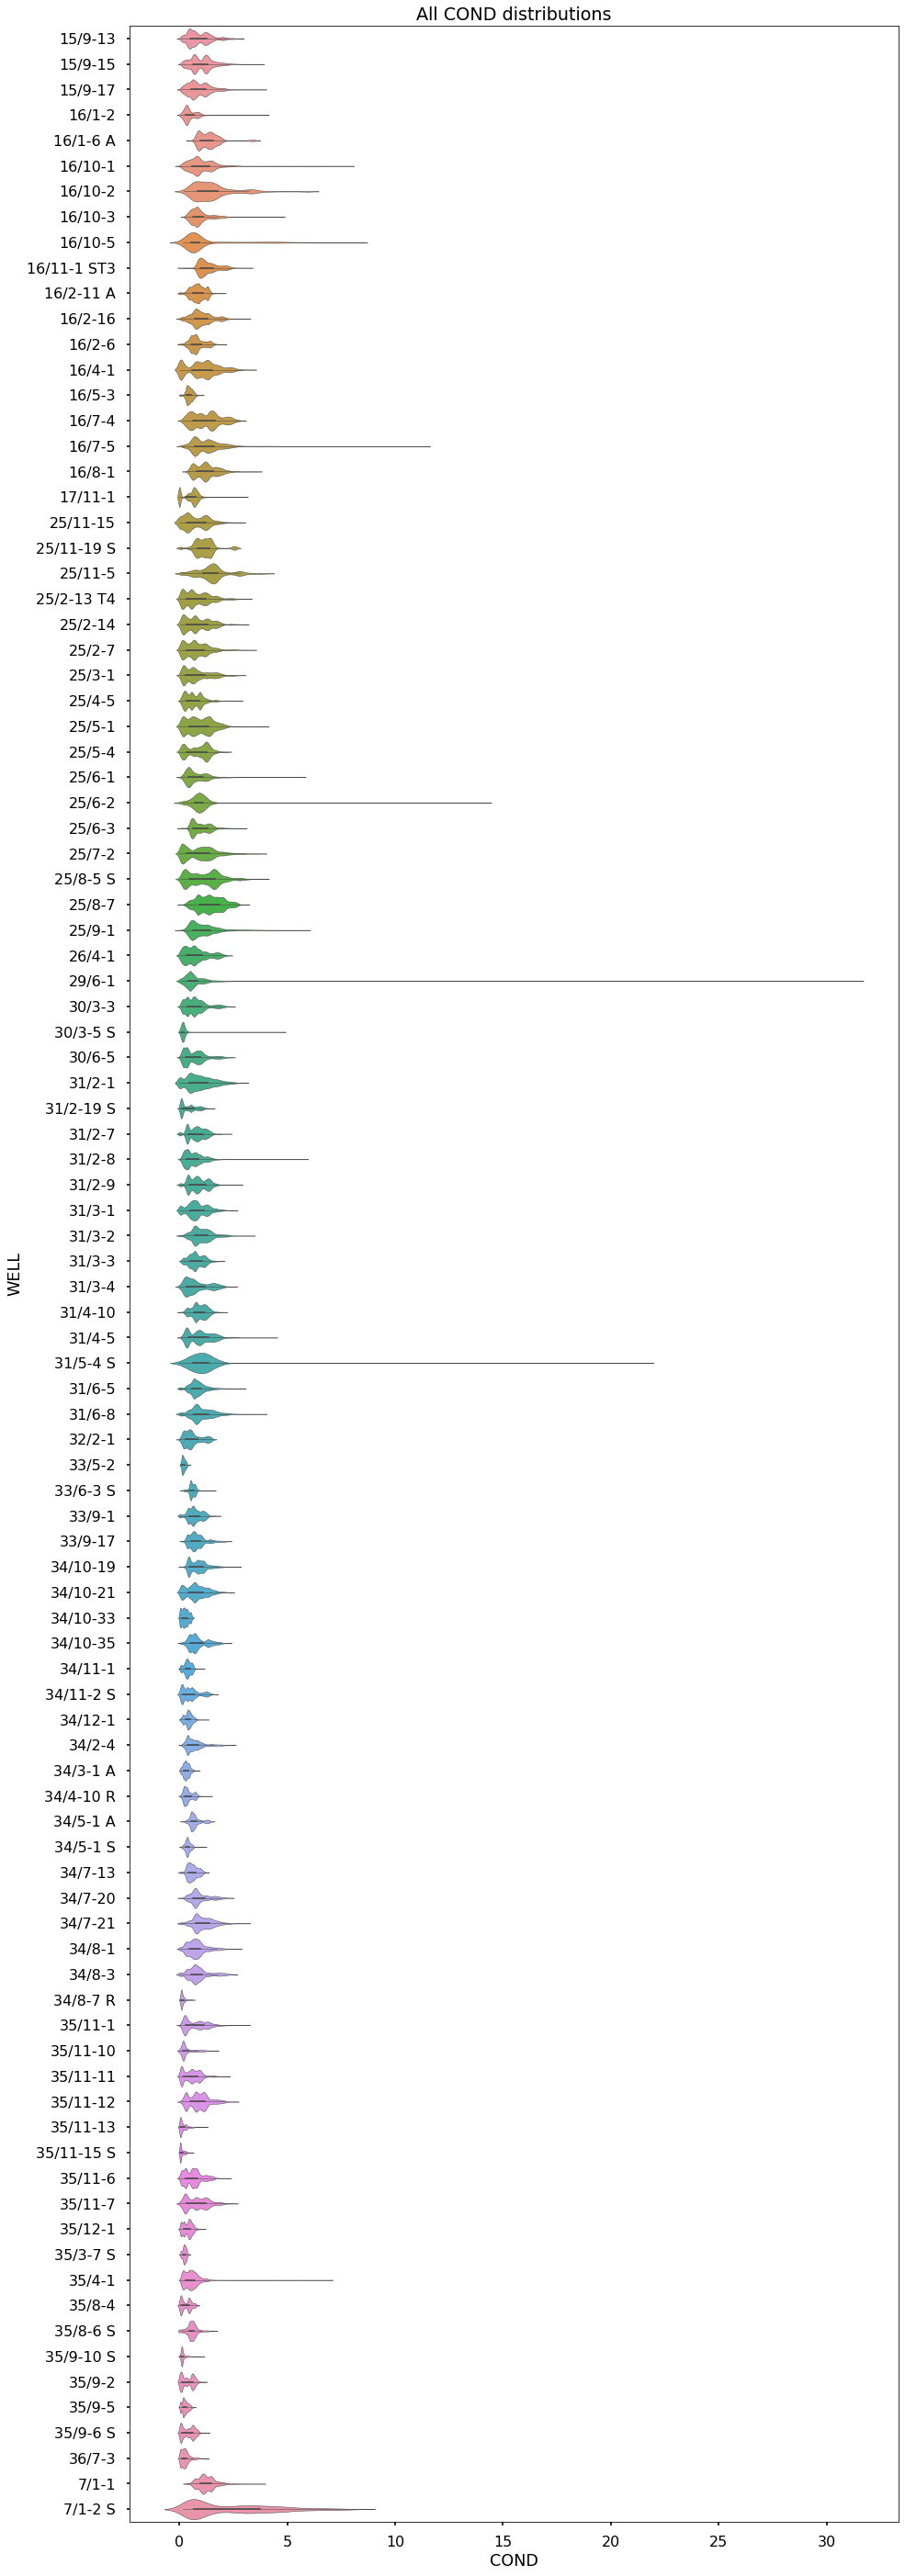

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 50))

sns.violinplot(data=data,
               x='COND',
               y='WELL',
               common_norm=False,
               scale="width",
               fill=False,
               legend=False,
               linewidth=0.5,
               ax=ax)

# plt.axvline(x=np.log(low_gr))
# plt.axvline(x=np.log(high_gr))


plt.title('All COND distributions')

# ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
# ax.xaxis.set_ticks([np.log10(x) for p in range(-4,8) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)

plt.show()